In [211]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Step 1: Load the Cancer dataset
- Use `from sklearn.datasets import load_breast_cancer`
- Split data into train and test sets, utilize `data` and `target` from the downloaded cancer dataset

In [212]:
from sklearn.datasets import load_breast_cancer

In [213]:
cancer = load_breast_cancer()

In [214]:
X,y = cancer.data, cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Step 2: Fitting the Tree Model
- Create a tree model with `max_depth=2`. Use `from sklearn.tree import DecisionTreeClassifier`
- Plot the tree with feature names. Use `from sklearn.tree import plot_tree`

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
DT1 = DecisionTreeClassifier(max_depth=2)

In [218]:
DT1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [219]:
X_train.shape

(426, 30)

In [220]:
from sklearn.tree import plot_tree

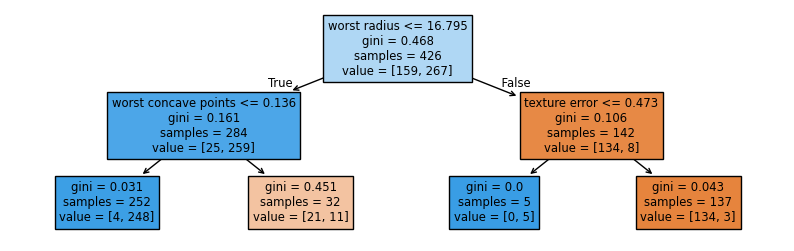

In [221]:
plt.figure(figsize=(10,3))
# semicolon at end to suppress output
plot_tree(DT1, feature_names = cancer.feature_names, filled=True);#

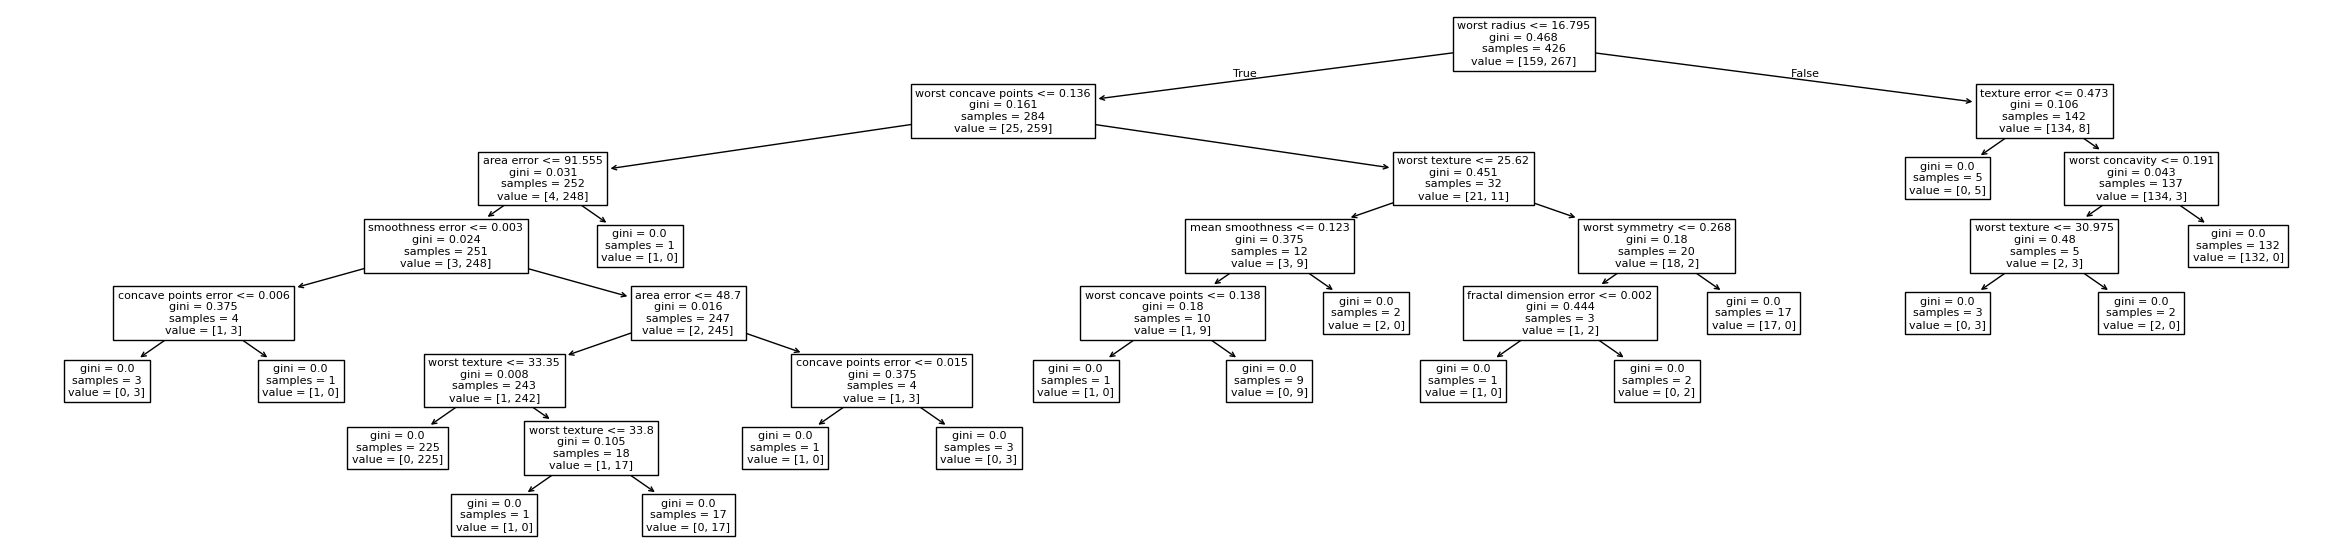

In [222]:
DT2 = DecisionTreeClassifier()
DT2.fit(X_train,y_train)
plt.figure(figsize=(30,7))
# semicolon at end to suppress output
plot_tree(DT2, feature_names = cancer.feature_names);#

In [223]:
DT2.feature_importances_

array([0.   , 0.   , 0.   , 0.   , 0.014, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.046, 0.   , 0.012, 0.002, 0.   , 0.   , 0.015,
       0.   , 0.007, 0.695, 0.054, 0.   , 0.   , 0.   , 0.   , 0.017,
       0.126, 0.011, 0.   ])

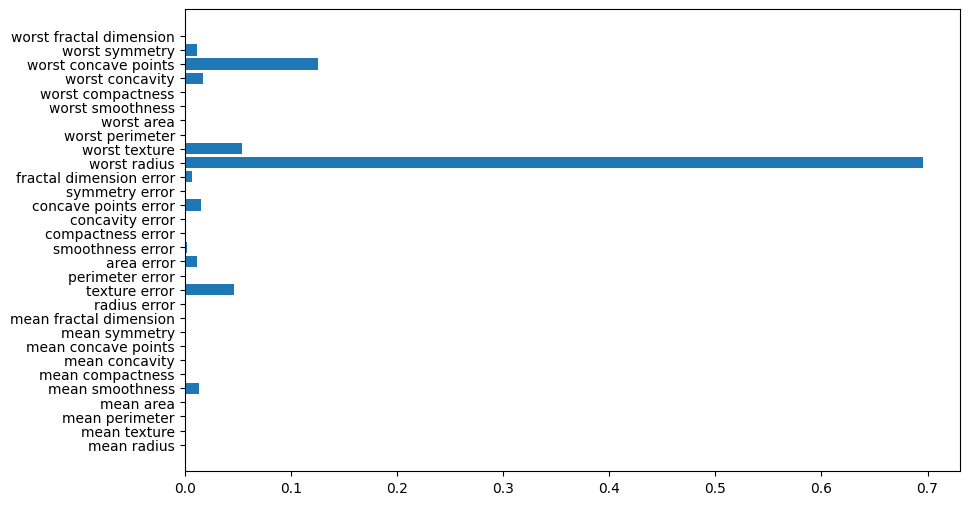

In [224]:
plt.figure(figsize=(10,6))
plt.barh(range(len(cancer.feature_names)), DT2.feature_importances_)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names);#

### Step 3: Parameter Tuning
- Create a grtid search for `max_depth`. Use integer values from 1 to 6.
- Plot the mean train and test scores versus the maximum depth


In [225]:
param_grid = {'max_depth':range(1,7)}

In [226]:
from sklearn.model_selection import GridSearchCV

In [227]:
mygrid = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid = param_grid, 
    cv=5, 
    return_train_score=True
)

In [228]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 7)}, return_train_score=True)

In [229]:
result = pd.DataFrame(mygrid.cv_results_)

In [230]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002215,0.000662,0.000805,0.000217,1,{'max_depth': 1},0.860465,0.929412,0.870588,0.894118,...,0.894446,0.026400,6,0.929412,0.920821,0.929619,0.923754,0.920821,0.924885,0.003930
1,0.002916,0.000296,0.000743,0.000175,2,{'max_depth': 2},0.872093,0.941176,0.917647,0.917647,...,0.927360,0.037788,2,0.958824,0.958944,0.961877,0.970674,0.958944,0.961853,0.004559
2,0.003802,0.000186,0.000811,0.000173,3,{'max_depth': 3},0.906977,0.964706,0.917647,0.917647,...,0.936689,0.028198,1,0.976471,0.973607,0.985337,0.976540,0.970674,0.976526,0.004907
3,0.004381,0.000215,0.000759,0.000125,4,{'max_depth': 4},0.895349,0.952941,0.905882,0.905882,...,0.922599,0.025071,4,0.979412,0.988270,0.991202,0.979472,0.976540,0.982979,0.005694
4,0.005236,0.000168,0.000830,0.000111,5,{'max_depth': 5},0.895349,0.952941,0.905882,0.929412,...,0.920246,0.019929,5,0.991176,0.991202,0.997067,0.988270,0.991202,0.991784,0.002874
5,0.005721,0.000329,0.000838,0.000068,6,{'max_depth': 6},0.895349,0.941176,0.917647,0.929412,...,0.924952,0.017182,3,0.994118,0.994135,1.000000,0.994135,0.994135,0.995304,0.002348


In [231]:
result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

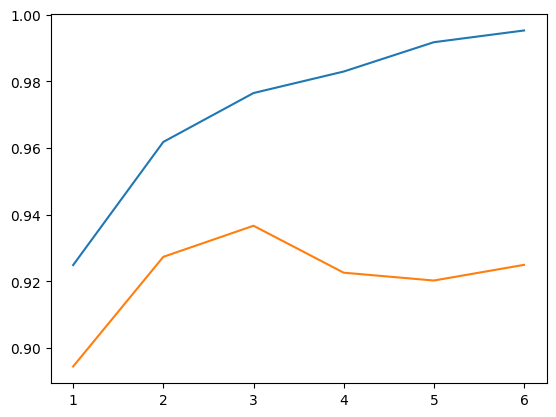

In [232]:
plt.plot(result['param_max_depth'], result['mean_train_score'])
plt.plot(result['param_max_depth'], result['mean_test_score']);#output different here

### Step 4: Parameter Tuning
- Create a grtid search for `max_leaf_nodes`. Use integer values from 2 to 19.
- Plot the mean train and test scores versus the maximum depth


### Step 5: Extrapolation
- Read the dataset `ram_prices.csv`
- Plot the price versus year. Use logarithmic scale for the price.
- Create train and test datasets by splitting the data as train data being data before year 2000 and test data being data after year 2000
- Use price as the target variable. Take logarithm of the price.
- Train a tree and linear regression model
- Plot the train and test datasets as well as the predictions for the train dataset
- Plot the train and test datasets as well as the predictions for the the entire dataset


In [233]:
df = pd.read_csv('ram_price.csv', index_col=0)
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


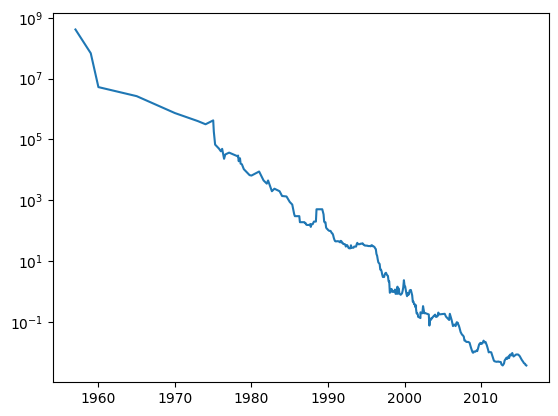

In [234]:
plt.semilogy(df['date'], df['price'])

In [235]:
df_train = df[df['date'] < 2000]
df_test = df[df['date'] >= 2000]

In [236]:
# this cannot work since it is 1 dimensional
# X_train = df_train['date']
X_train = df_train['date'].values.reshape(-1,1)
y_train = np.log(df_train['price'])

In [237]:
X_test = df_test['date'].values.reshape(-1,1)
y_test = np.log(df_test['price'])

In [238]:
from sklearn.linear_model import LinearRegression

In [239]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [240]:
X_train.shape

(202, 1)

In [241]:
from sklearn.tree import DecisionTreeRegressor

In [242]:
DT3 = DecisionTreeRegressor(max_depth=4)

In [243]:
DT3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

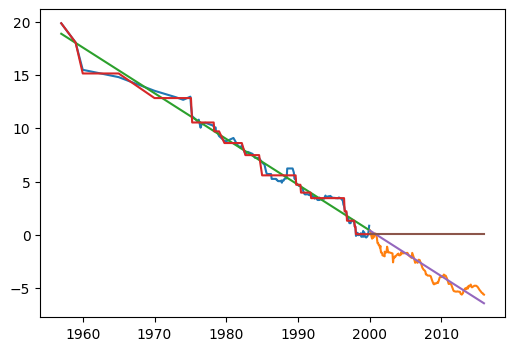

In [244]:
plt.figure(figsize=(6, 4))
plt.plot(df_train['date'], y_train)
plt.plot(df_test['date'], y_test)

plt.plot(df_train['date'], LR.predict(X_train))
plt.plot(df_train['date'], DT3.predict(X_train))

plt.plot(df_test['date'], LR.predict(X_test))
plt.plot(df_test['date'], DT3.predict(X_test))

### Step 6: Feature Importance
- Load Iris dataset using `from sklearn.datasets import load_iris`
- Train a DT with `max_leaf_nodes=6`
- Plot the decision tree 
- Print the feature importance using `tree.feature_importances_`
- Create a bar graph for feature importance